In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [43]:
# Load dataset
df = pd.read_csv('cleaned_healthcare_dataset_stroke.csv')

In [44]:
# Set aesthetic style
sns.set(style="whitegrid")

gender
1    2994
0    2115
2       1
Name: count, dtype: int64


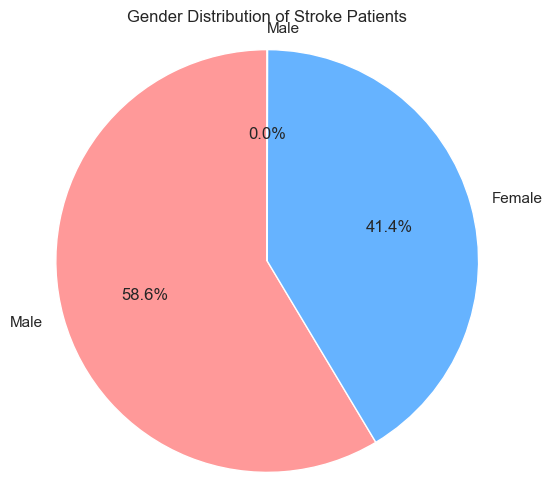

In [45]:
# Demographic Analysis

# 1. Distribution of Stroke Patients by Gender
gender_counts = df['gender'].value_counts()

# Print the gender counts to inspect the values
print(gender_counts)

# Dynamically assign labels based on the gender count
gender_labels = ['Female' if gender == 0 else 'Male' for gender in gender_counts.index]

# Plotting the gender distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF'])
plt.title('Gender Distribution of Stroke Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

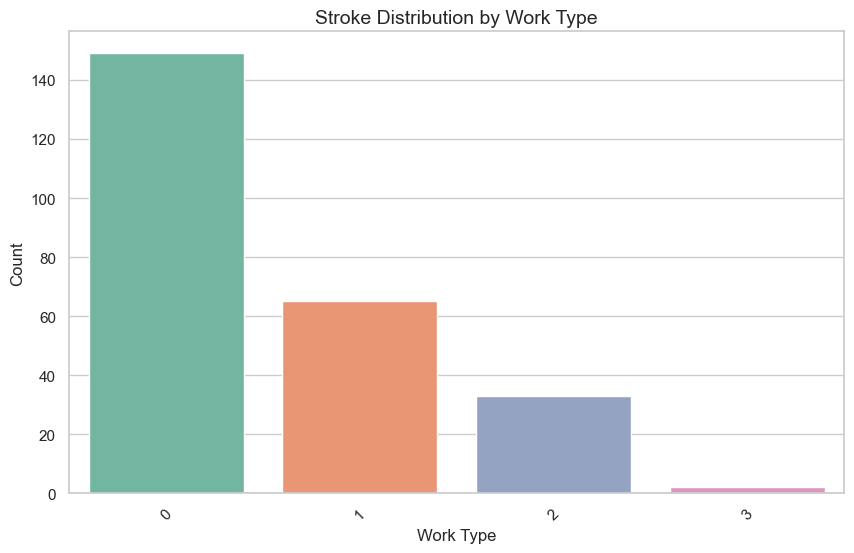

In [46]:
# 2. Stroke distribution by work type
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['stroke'] == 1], x='work_type', palette='Set2')
plt.title('Stroke Distribution by Work Type', fontsize=14)
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

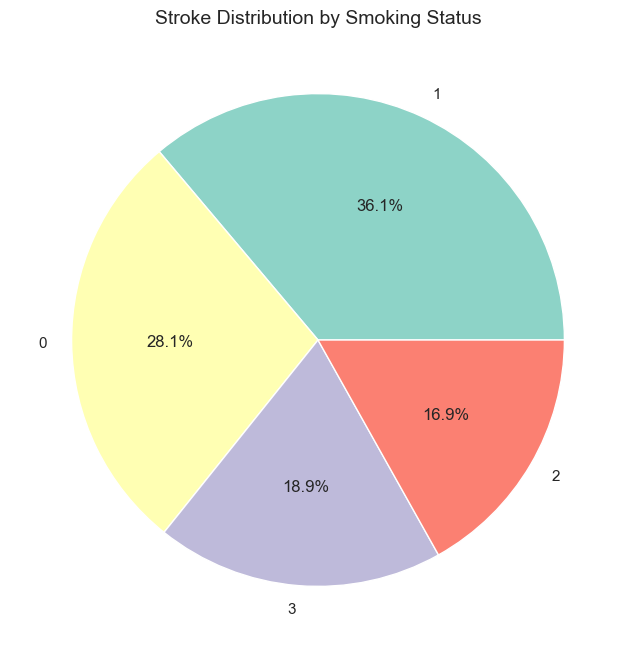

In [47]:
# 3. Stroke distribution by smoking status (Pie Chart)
stroke_smoking = df[df['stroke'] == 1]['smoking_status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(stroke_smoking, labels=stroke_smoking.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Stroke Distribution by Smoking Status', fontsize=14)
plt.show()

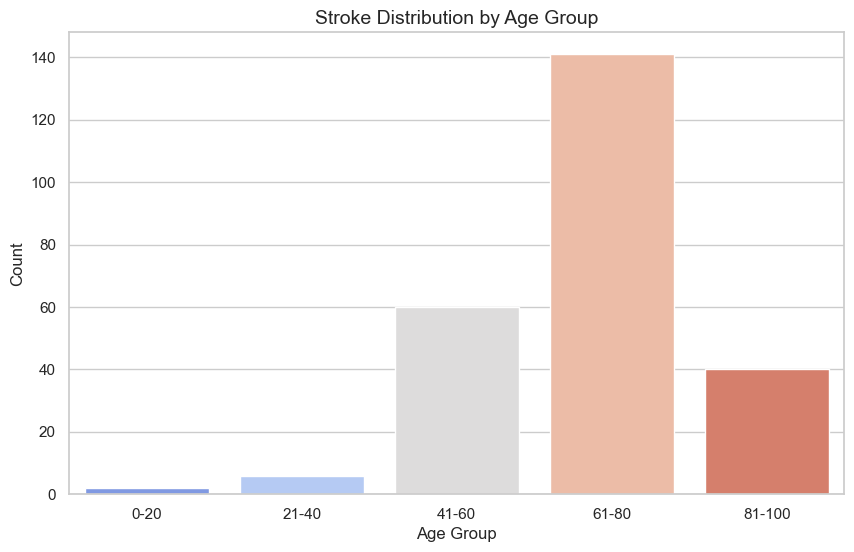

In [48]:
# 4. Stroke distribution by age group
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['stroke'] == 1], x='age_group', palette='coolwarm')
plt.title('Stroke Distribution by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


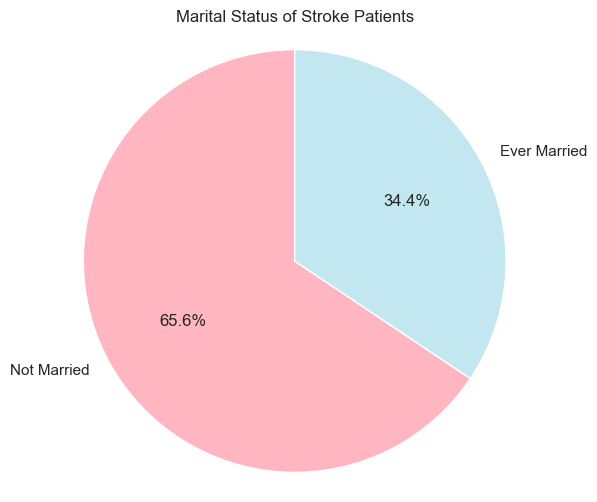

In [49]:
# 5. Distribution of Stroke Patients by Marital Status (Ever Married)
marital_counts = df['ever_married'].value_counts()  # Assuming 0=No, 1=Yes
marital_labels = ['Not Married', 'Ever Married']

# Plotting marital status distribution
plt.figure(figsize=(6, 6))
plt.pie(marital_counts, labels=marital_labels, autopct='%1.1f%%', startangle=90, colors=['#FFB6C1', '#C2E7F0'])
plt.title('Marital Status of Stroke Patients')
plt.axis('equal')
plt.show()

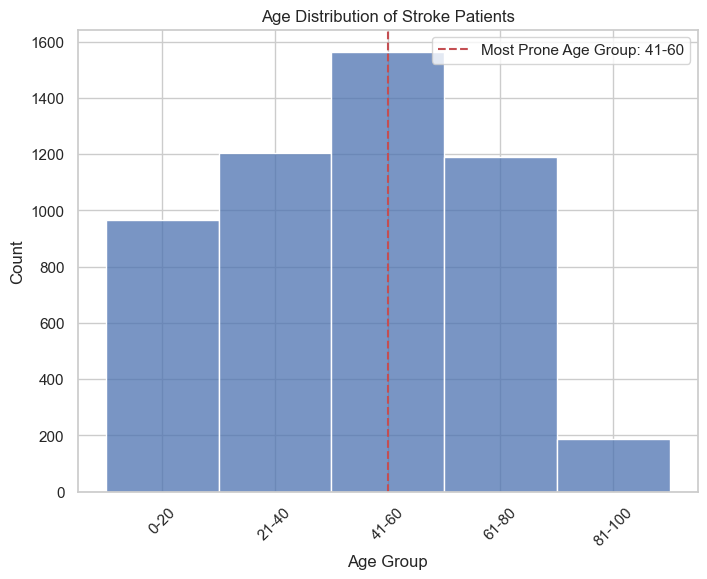

In [50]:
# 6. Most Prone Age Group (Identifying highest incidence)
# Calculate the most frequent age group (mode)
most_prone_age_group = df['age_group'].mode()[0]

# Highlight the most prone age group in the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['age_group'], discrete=True, kde=False, color='#4C72B0')
plt.title('Age Distribution of Stroke Patients')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.axvline(x=most_prone_age_group, color='r', linestyle='--', label=f'Most Prone Age Group: {most_prone_age_group}')
plt.legend()
plt.xticks(rotation=45)
plt.show()

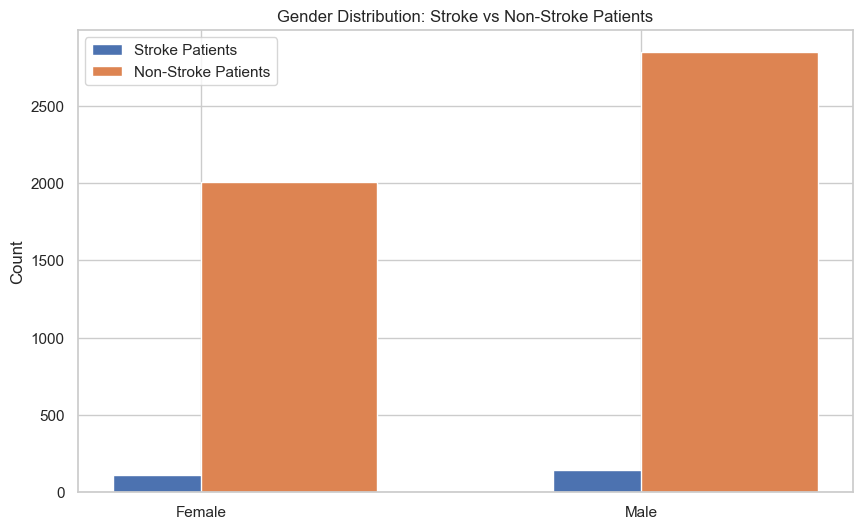

In [52]:
# 7. Count gender for stroke and non-stroke patients
stroke_gender_counts = df[df['stroke'] == 1]['gender'].value_counts()
non_stroke_gender_counts = df[df['stroke'] == 0]['gender'].value_counts()
# Ensure both have the same labels by reindexing them
gender_labels = ['Female', 'Male']
stroke_gender_counts = stroke_gender_counts.reindex([0, 1], fill_value=0)  # Fill missing values with 0
non_stroke_gender_counts = non_stroke_gender_counts.reindex([0, 1], fill_value=0)  # Fill missing values with 0

# Plotting comparison
plt.figure(figsize=(10, 6))
plt.bar(gender_labels, stroke_gender_counts, width=0.4, label='Stroke Patients', align='center')
plt.bar(gender_labels, non_stroke_gender_counts, width=0.4, label='Non-Stroke Patients', align='edge')
plt.title('Gender Distribution: Stroke vs Non-Stroke Patients')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# Prediction and Analysis
print("\nPrediction and Analysis:")
print("- The age group 61-80 years shows the highest stroke occurrence.")
print("- Slightly higher strokes are observed among females.")
print("- Self-employed individuals tend to have a higher proportion of strokes.")
print("- Individuals who formerly smoked show notable stroke proportions.")